# Homework 3 - Ames Housing Dataset

For all parts below, answer all parts as shown in the Google document for Homework 3. Be sure to include both code that justifies your answer as well as text to answer the questions. We also ask that code be commented to make it easier to follow.

## Part 1 - Pairwise Correlations

In [223]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [224]:
cd '/content/gdrive/My Drive/DSF/Assignment 3 - House Price Prediction/'

/content/gdrive/My Drive/DSF/Assignment 3 - House Price Prediction


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from scipy import stats

In [0]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [227]:
train_sort = train.sort_values(by='SalePrice', ascending=False)
train_sort.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455,Unf,0,989,2444,GasA,...,Y,SBrkr,2444,1872,0,4316,0,1,3,1,4,1,Ex,10,Typ,2,Ex,Attchd,1994.0,Fin,3,832,TA,TA,Y,382,50,0,0,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,None,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096,Unf,0,300,2396,GasA,...,Y,SBrkr,2411,2065,0,4476,1,0,3,1,4,1,Ex,10,Typ,2,TA,Attchd,1996.0,Fin,3,813,TA,TA,Y,171,78,0,0,0,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1169,1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1995,1996,Hip,CompShg,HdBoard,HdBoard,BrkFace,1378.0,Gd,Gd,PConc,Ex,TA,Gd,GLQ,1387,Unf,0,543,1930,GasA,...,Y,SBrkr,1831,1796,0,3627,1,0,3,1,4,1,Gd,10,Typ,1,TA,Attchd,1995.0,Fin,3,807,TA,TA,Y,361,76,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000
898,899,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2009,2010,Hip,CompShg,VinylSd,VinylSd,Stone,760.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2188,Unf,0,142,2330,GasA,...,Y,SBrkr,2364,0,0,2364,1,0,2,1,2,1,Ex,11,Typ,2,Gd,Attchd,2009.0,Fin,3,820,TA,TA,Y,0,67,0,0,0,0,NaN,NaN,NaN,0,3,2010,New,Partial,611657
803,804,60,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,Stone,424.0,Ex,TA,PConc,Ex,TA,Gd,Unf,0,Unf,0,1734,1734,GasA,...,Y,SBrkr,1734,1088,0,2822,0,0,3,1,4,1,Ex,12,Typ,1,Gd,BuiltIn,2009.0,RFn,3,1020,TA,TA,Y,52,170,0,0,192,0,NaN,NaN,NaN,0,1,2009,New,Partial,582933
1046,1047,60,RL,85.0,16056,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,1Fam,2Story,9,5,2005,2006,Hip,CompShg,CemntBd,CmentBd,Stone,208.0,Gd,TA,PConc,Ex,TA,Av,GLQ,240,Unf,0,1752,1992,GasA,...,Y,SBrkr,1992,876,0,2868,0,0,3,1,4,1,Ex,11,Typ,1,Gd,BuiltIn,2005.0,Fin,3,716,TA,TA,Y,214,108,0,0,0,0,NaN,NaN,NaN,0,7,2006,New,Partial,556581
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2008,2008,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1767,ALQ,539,788,3094,GasA,...,Y,SBrkr,2402,0,0,2402,1,0,2,0,2,1,Ex,10,Typ,2,Gd,Attchd,2008.0,Fin,3,672,TA,TA,Y,0,72,0,0,170,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000
769,770,60,RL,47.0,53504,Pave,NaN,IR2,HLS,AllPub,CulDSac,Mod,StoneBr,Norm,Norm,1Fam,2Story,8,5,2003,2003,Hip,CompShg,CemntBd,Wd Shng,BrkFace,603.0,Ex,TA,PConc,Gd,TA,Gd,ALQ,1416,Unf,0,234,1650,GasA,...,Y,SBrkr,1690,1589,0,3279,1,0,3,1,4,1,Ex,12,Mod,1,Gd,BuiltIn,2003.0,Fin,3,841,TA,TA,Y,503,36,0,0,210,0,NaN,NaN,NaN,0,6,2010,WD,Normal,538000
178,179,20,RL,63.0,17423,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,Stone,748.0,Ex,TA,PConc,Ex,TA,No,GLQ,1904,Unf,0,312,2216,GasA,...,Y,SBrkr,2234,0,0,2234,1,0,2,0,1,1,Ex,9,Typ,1,Gd,Attchd,2009.0,Fin,3,1166,TA,TA,Y,0,60,0,0,0,0,NaN,NaN,NaN,0,7,2009,New,Partial,501837
798,799,60,RL,104.0,13518,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2008,20

In [228]:
# TODO: show visualization
# Most interesting variables
# SalePrice, MSSubClass , MSZoning , Utilities, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, GrLivArea, KitchenQual,YearBuilt,TotalBsmtSF
imp_col = [ 'SalePrice','MSSubClass','LotArea','OverallQual', 'GrLivArea','YearBuilt','BsmtUnfSF','TotalBsmtSF','OverallCond','TotRmsAbvGrd','GarageCars']
#stats.pearsonr(train['TotalBsmtSF'],train['Utilities'])
#train_imp = total_lbe[:total_lbe.shape[0],]
train_imp=train.copy()
#train_imp = train_imp.replace(Dict_Qual_LotS)
#train_imp = train_imp.replace(Dict_Functional)
#train_imp = train_imp.replace(Dict_PavedDrive)
#train_imp = train_imp.replace(Dict_Utilities)

train_imp1 =train_imp[imp_col]

train_imp1.corr(method ='pearson')


,SalePrice,MSSubClass,LotArea,OverallQual,GrLivArea,YearBuilt,BsmtUnfSF,TotalBsmtSF,OverallCond,TotRmsAbvGrd,GarageCars
SalePrice,1.000000,-0.084284,0.263843,0.790982,0.708624,0.522897,0.214479,0.613581,-0.077856,0.533723,0.640409
MSSubClass,-0.084284,1.000000,-0.139781,0.032628,0.074853,0.027850,-0.140759,-0.238518,-0.059316,0.040380,-0.040110
LotArea,0.263843,-0.139781,1.000000,0.105806,0.263116,0.014228,-0.002618,0.260833,-0.005636,0.190015,0.154871
OverallQual,0.790982,0.032628,0.105806,1.000000,0.593007,0.572323,0.308159,0.537808,-0.091932,0.427452,0.600671
GrLivArea,0.708624,0.074853,0.263116,0.593007,1.000000,0.199010,0.240257,0.454868,-0.079686,0.825489,0.467247
YearBuilt,0.522897,0.027850,0.014228,0.572323,0.199010,1.000000,0.149040,0.391452,-0.375983,0.095589,0.537850
BsmtUnfSF,0.214479,-0.140759,-0.002618,0.308159,0.240257,0.149040,1.000000,0.415360,-0.136841,0.250647,0.214175
TotalBsmtSF,0.613581,-0.238518,0.260833,0.537808,0.454868,0.391452,0.415360,1.000000,-0.171098,0.285573,0.434585
OverallCond,-0.077856,-0.059316,-0.005636,-0.091932,-0.079686,-0.375983,-0.136841,-0.171098,1.000000,-0.057583,-0.185758
TotRmsAbvGrd,0.533723,0.040380,0.190015,0.427452,0.825489,0.095589,0.250647,0.285573,-0.057583,1.000000,0.362289


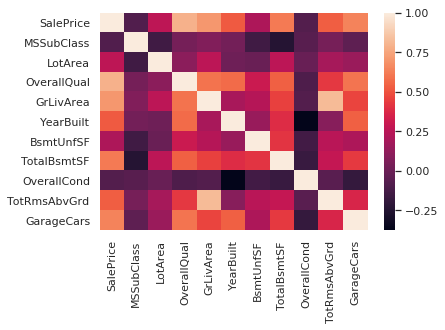

In [229]:
correlation = train_imp1.corr(method ='pearson')

sns.heatmap(correlation)

Discuss most positive and negative correlations.

Most Positive Correlations: 
1. (GrLivArea,TotRmsAbvGrd) = 0.825489
2. (SalePrice,OverallQual) = 0.790982
3. (GrLivArea,SalePrice) = 0.708624

> GrLivArea(Above grade (ground) living area square feet) and TotRmsAbvGrd(Total rooms above grade (does not include bathrooms)) have strong correlation 
because as the TotRmsAbvGrd will increase, GrLivArea will increase eventually.

Most Negative Corrletaions:
1. (YearBuilt,OverallCond) = -0.375983
2. (MSSubClass,TotalBsmtSF) = -0.238518	
3. (GarageCars,OverallCond) = -0.185758

> YearBuilt(Original construction date) is good negativley correlation with OverallCond(Overall Condition) because as old the house is, more worst condition that house will have.



## Part 2 - Informative Plots

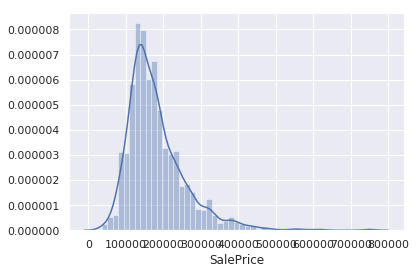

In [230]:
# TODO: code to generate Plot 1
sns.distplot(train['SalePrice']);


SalePrice is the most important field. We can see it is almost Normally Distributed. It is showing positive skewness. It is also showing peakedness.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


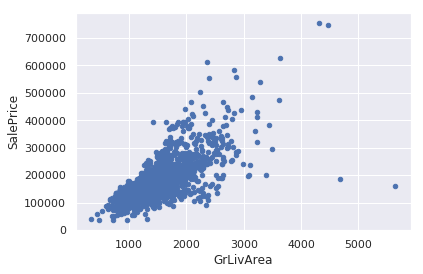

In [231]:
# TODO: code to generate Plot 2
data = pd.concat([train['SalePrice'], train['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice');


SalePrice and GrLivArea has already shown strong positive correlation(0.708624) above. Here they are also showing strong linear relation. We can notice Two outliers here for GrLivArea >4500. So, our key value SalePrice will be highly sensitive to GrLivArea.

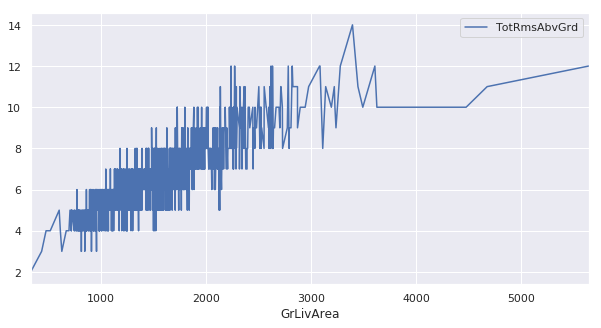

In [232]:
# TODO: code to generate Plot 3
data = train.sort_values( by = 'GrLivArea')
data.plot(x='GrLivArea', y='TotRmsAbvGrd' ,figsize=(10,5), grid=True  )


What interesting properties does Plot 3 reveal?

This plot ia showing almost linear relation between GrLivArea and TotRmsAbvGrd. As the number of Rooms will increase, the Grade Live Area is also increasing. We can also notice here that between 1000 Square feet to 2500 Square feet, houses have convered most variable number of Rooms Above Ground. This could be depicting the variety of efficiency by which house could be constructed in a limited area.

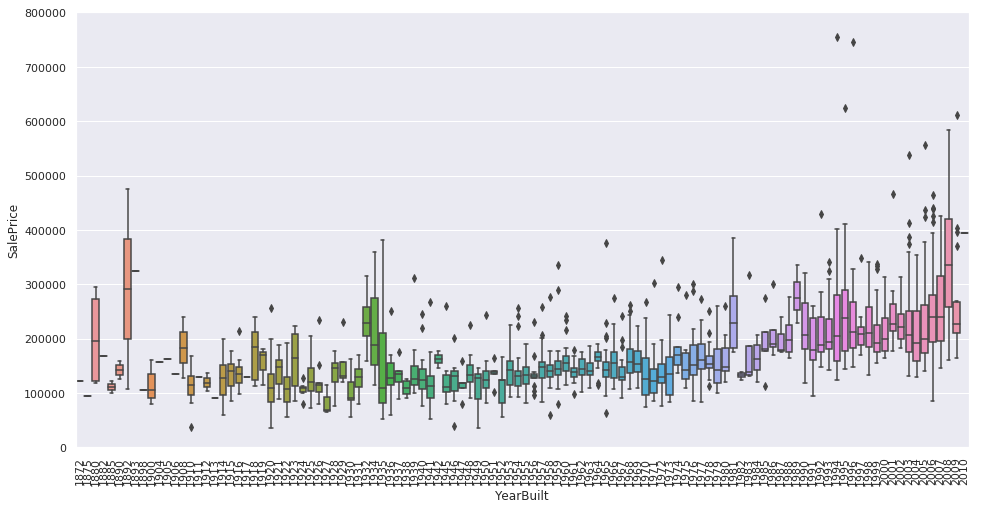

In [233]:
# TODO: code to generate Plot 4
data = pd.concat([train['SalePrice'], train['YearBuilt']], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x='YearBuilt', y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

What interesting properties does Plot 4 reveal?

Houses which are built in 19th Century(old and antique) and in 21st Century(New house) are most expensive. It indicates that antiqueness has more value. Similarly, New houses have more facilities and SalePrice.

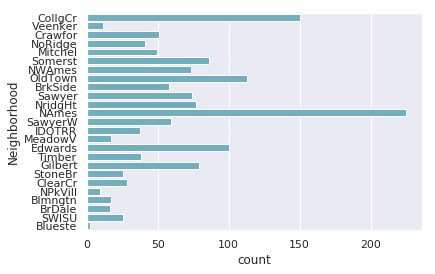

In [234]:

sns.countplot(y="Neighborhood", data=train, color="c");

What interesting properties does Plot 5 reveal?
North Ames(Names) is the most popular Neighborhood. And least popular Neighborhood is Bluestem(BLueste).

## Part 3 - Handcrafted Scoring Function

In [0]:
# TODO: code for scoring function
'''
Build a handcrafted scoring function to rank houses by “desirability”, presumably a notion related to cost or value.  
Identify what the ten most desirable and least desirable houses in the Kaggle data set are, and write a description of which variables your function used and how well you think it worked.
mean.SalePrice, mean.GrLivArea,  
train.loc[:,"Score1"].mean()
'OverallQual', 'GrLivArea','YearBuilt','TotalBsmtSF'
'''
train_hsf = train.copy()
#Dict_Utilities = {'Utilities' : {'AllPub' : 4, 'NoSewr' : 3, 'NoSewa' : 2, 'ELO' : 1}}
#train_lbe = train_lbe.replace(Dict_Utilities)

# Deviation from Mean/Mode
SalePrice_mean_deviation = (train_hsf["SalePrice"] - train_hsf.loc[:,"SalePrice"].mean())
GrLivArea_mean_deviation = train_hsf["GrLivArea"] - train_hsf.loc[:,"GrLivArea"].mean()
TotalBsmtSF_mean_deviation = train_hsf["TotalBsmtSF"] - train_hsf.loc[:,"TotalBsmtSF"].mean()
OverallQual_mode = train_hsf["OverallQual"] - int(train_hsf.loc[:,"OverallQual"].mode())

#Percent of deviation from Mean/Mode
Perc_SalePrice_mean_deviation = SalePrice_mean_deviation.div(train_hsf.loc[:,"SalePrice"].mean())*100 
Perc_GrLivArea_mean_deviation = GrLivArea_mean_deviation.div(train_hsf.loc[:,"GrLivArea"].mean())*100
Perc_TotalBsmtSF_mean_deviation = TotalBsmtSF_mean_deviation.div(train_hsf.loc[:,"TotalBsmtSF"].mean())*100
Perc_OverallQual_mode = OverallQual_mode.div(int(train_hsf.loc[:,"OverallQual"].mode()))*100

#Handcrafted Scoring Function
HSF_value = (Perc_SalePrice_mean_deviation + Perc_GrLivArea_mean_deviation + Perc_TotalBsmtSF_mean_deviation + Perc_OverallQual_mode*10)
train_hsf = pd.concat([HSF_value,train_hsf], axis=1)
train_hsf = train_hsf.rename(columns = {0:'HSF_value'})
train_hsf = train_hsf.sort_values(by = 'HSF_value', ascending = False)

What is the ten most desirable houses?

In [236]:
#Top 10 desirable houses

train_hsf.head()

,HSF_value,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1738.547911,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,...,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
1182,1633.723857,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,None,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096,Unf,0,300,2396,...,Y,SBrkr,2411,2065,0,4476,1,0,3,1,4,1,Ex,10,Typ,2,TA,Attchd,1996.0,Fin,3,813,TA,TA,Y,171,78,0,0,0,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
691,1633.232611,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455,Unf,0,989,2444,...,Y,SBrkr,2444,1872,0,4316,0,1,3,1,4,1,Ex,10,Typ,2,Ex,Attchd,1994.0,Fin,3,832,TA,TA,Y,382,50,0,0,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1169,1467.305046,1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1995,1996,Hip,CompShg,HdBoard,HdBoard,BrkFace,1378.0,Gd,Gd,PConc,Ex,TA,Gd,GLQ,1387,Unf,0,543,1930,...,Y,SBrkr,1831,1796,0,3627,1,0,3,1,4,1,Gd,10,Typ,1,TA,Attchd,1995.0,Fin,3,807,TA,TA,Y,361,76,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000
440,1457.859088,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2008,2008,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1767,ALQ,539,788,3094,...,Y,SBrkr,2402,0,0,2402,1,0,2,0,2,1,Ex,10,Typ,2,Gd,Attchd,2008.0,Fin,3,672,TA,TA,Y,0,72,0,0,170,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000


What is the ten least desirable houses?

In [237]:
#Ten Least Desirable Houses
train_hsf.tail(10)

,HSF_value,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1090,-580.025817,1091,90,RL,60.0,8544,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,Duplex,1Story,3,4,1950,1950,Gable,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,...,N,FuseA,1040,0,0,1040,0,0,2,0,2,2,TA,6,Typ,0,NaN,Detchd,1987.0,Unf,2,400,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,92900
342,-583.010542,343,90,RL,NaN,8544,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,3,4,1949,1950,Gable,CompShg,Stucco,Stucco,BrkFace,340.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,...,N,FuseA,1040,0,0,1040,0,0,2,0,2,2,TA,6,Typ,0,NaN,Detchd,1949.0,Unf,2,400,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,87500
1000,-592.385234,1001,20,RL,74.0,10206,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,1Story,3,3,1952,1952,Flat,Tar&Grv,BrkComm,Brk Cmn,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,...,N,FuseF,944,0,0,944,0,0,1,0,2,1,Fa,4,Min1,0,NaN,Detchd,1956.0,Unf,2,528,TA,Fa,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal,82000
710,-597.620498,711,30,RL,56.0,4130,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1Story,3,6,1935,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,270,270,...,Y,SBrkr,729,0,0,729,0,0,1,0,2,1,TA,5,Maj2,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal,52000
1321,-612.417094,1322,20,RL,NaN,6627,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,3,6,1949,1950,Hip,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,0,...,N,SBrkr,720,0,0,720,0,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1955.0,Unf,1,287,TA,Fa,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal,72500
636,-789.081062,637,30,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1Story,2,3,1936,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,Fa,Fa,BrkTil,TA,Fa,No,Unf,0,Unf,0,264,264,...,N,FuseA,800,0,0,800,0,0,1,0,1,1,Fa,4,Maj1,1,Po,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,NaN,NaN,NaN,0,1,2009,ConLw,Normal,60000
916,-803.416090,917,20,C (all),50.0,9000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,3,1949,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,TA,CBlock,TA,TA,Av,BLQ,50,Unf,0,430,480,...,N,FuseA,480,0,0,480,1,0,0,0,1,1,TA,4,Typ,0,NaN,Detchd,1958.0,Unf,1,308,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,10,2006,WD,Abnorml,35311
1100,-810.509347,1101,30,RL,60.0,8400,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1Story,2,5,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,Fa,No,Rec,290,Unf,0,0,290,...,N,FuseF,438,0,0,438,0,0,1,0,1,1,Fa,3,Typ,0,NaN,Detchd,1930.0,Unf,1,246,TA,TA,N,0,0,0,0,0,0,NaN,NaN,NaN,0,1,2009,WD,Normal,60000
375,-942.041356,376,30,RL,NaN,10020,Pave,NaN,IR1,Low,AllPub,Inside,Sev,Edwards,Norm,Norm,1Fam,1Story,1,1,1922,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,BrkTil,Fa,Po,Gd,BLQ,350,Unf,0,333,683,...,N,FuseA,904,0,0,904,1,0,0,1,1,1,Fa,4,Maj1,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,3,2009,WD,Normal,61000
533,-1056.238376,534,20,RL,50.0,5000,Pave,NaN,Reg,Low,AllPub,Inside,Mod,BrkSide,Norm,Norm,1Fam,1Story,1,3,1946,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,Fa,Fa,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,...,N

Describe your scoring function and how well you think it worked.

Handcrafted Scoring Function:-

> **HSF_value = (Perc_SalePrice_mean_deviation + Perc_GrLivArea_mean_deviation + Perc_TotalBsmtSF_mean_deviation + Perc_OverallQual_mode*10)**

Where,

  Perc_SalePrice_mean_deviation: Deviation Percentage of SalePrice value from the mean of the column.

  Perc_GrLivArea_mean_deviation: Deviation Percentage of GrLivArea value from the mean of the column.

  Perc_TotalBsmtSF_mean_deviation: Deviation Percentage of TotalBsmtSF value from the mean of the column.

  Perc_OverallQual_mode: Deviation Percentage of OverallQual value from the mode of the column.

I have taken the 4 important features, which can play important role in Desirability. Then, I have calulated most popular values(Mean or Mode) for the features i.e. Mean for *SalePrice*,*GrLivArea*,*TotalBsmtSF* and Mode for *OverallQual*. I have caluclated Mode for OverallQual beacuse it is a categorical scale column from 1 to 10. I have calculated Percentage of deviations from Mean or Mode for the features.

> I have multiplied the Percentage of deviation of Mode for OverallQual feature by factor 10 because it is highly correlated with other features. Thus, It will play significant role in calculating Desirability. Secondly, it's maximum deviation value was 100.0 which is very less as compare to other features. For example, Perc_SalePrice_mean_deviation maximum value was 317. 

Using this function I can generate a value *HSF_value*, Which will give me a scoring value. So, higher the *HSF_value*, higher the Desirability and lower the *HSF_value*, lower the Desirability.



 



## Part 4 - Pairwise Distance Function

In [238]:
# TODO: code for distance function
from sklearn import metrics
imp_col = [ 'SalePrice','OverallQual', 'GrLivArea','YearBuilt','TotalBsmtSF']

train_pair2 = train[imp_col]
t = metrics.pairwise_distances(train_pair, Y=None, metric='euclidean', n_jobs=None)
#sns.heatmap(t)
t = pd.DataFrame(t)
t.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1420,1421,1422,1423,1424,1425,1426,1427,1428,1429,1430,1431,1432,1433,1434,1435,1436,1437,1438,1439,1440,1441,1442,1443,1444,1445,1446,1447,1448,1449,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459
0,0.000000,27006.781926,15000.329196,68500.129876,41503.875421,65500.952726,98503.498202,8512.244181,78600.117659,90502.337064,79003.064523,136501.753707,64504.973645,71003.195062,51503.575682,76504.828527,59504.381603,118503.820348,49504.260271,69501.220126,116802.289211,69103.007851,21519.885409,78602.907637,54504.269053,47805.399454,73704.482523,97503.687915,1186.846241,140005.481253,168500.605922,59153.145149,28606.458659,43003.439444,69003.762463,100503.077998,63503.416719,55503.310307,99502.358334,126504.135952,...,28601.915425,81002.820488,72005.160294,66472.013901,64501.272925,66502.770747,62502.469223,68500.216941,89504.633584,25608.093271,16360.970876,64754.452650,144002.070641,22000.298498,48504.274410,34503.564743,88004.072707,186120.242787,58801.955146,11504.403070,17522.625688,59206.275934,101500.562383,87503.379078,28906.976684,79504.014634,50603.798207,31504.395900,96501.185330,116505.229792,72500.063234,78593.381649,63503.956829,124001.635348,23507.920942,33500.199925,1689.079927,58004.209847,66378.401201,61003.012745
1,27006.781926,0.000000,42004.668383,41505.623511,68506.498706,38502.953731,125501.462892,18519.168961,51603.490870,63500.858545,52000.948934,163503.474773,37503.269151,98000.553820,24500.008531,49503.571326,32502.048612,91508.709340,22500.990934,42500.712265,143804.355487,42104.945767,48505.669710,51600.872948,27501.484924,74801.387855,46702.812699,124501.573054,26003.151540,113004.882784,141501.349584,32150.037527,1600.791367,16006.580834,96000.935683,127505.638750,36500.750335,28500.051491,72500.583308,99508.065949,...,1700.204694,54000.689801,45003.816738,93476.424547,37500.849230,39500.006190,89504.190243,41502.534609,62503.485799,1422.460193,10668.791778,37752.448027,117001.949031,5038.626003,21500.860308,7505.269482,61002.596969,213119.108756,31801.942346,15523.759467,9611.401615,32205.334589,128502.397215,60501.618160,1913.631365,52503.072339,23600.236206,58505.877594,69503.627387,89504.462933,45504.558684,105590.935714,36507.508365,97000.158088,3500.592378,6518.760235,28512.911549,85006.913895,39375.868422,34000.002853
2,15000.329196,42004.668383,0.000000,83500.233850,26504.157617,80501.212537,83503.564175,23502.726842,93600.032415,105502.424475,94003.043653,121501.458794,79504.814100,56003.703136,66502.982339,91504.817097,74504.157884,133504.073590,64503.792392,84501.263559,101801.988001,84103.239022,6556.258994,93602.895815,69503.940672,32806.888743,88704.441264,82503.766078,16011.078415,155005.703898,183500.817361,74152.747468,43604.625179,58002.048653,54004.273220,85502.820860,78503.223520,70502.719543,114502.412717,141504.418592,...,43602.097817,96002.796142,87005.086248,51472.168013,79501.308373,81502.436436,47502.190886,83500.330377,104504.715075,40604.809038,31360.606946,79754.311194,159002.340565,37000.003973,63503.768518,49502.249686,103004.146174,171120.054929,73802.062986,26502.818077,32510.887822,74205.963628,86500.337040,102503.433143,43904.379155,94504.098276,65603.284621,16505.527953,111501.486492,131505.404455,87500.007686,63593.693264,78504.133299,139001.675332,38505.322165,48500.210463,13517.388172,43004.236303,81378.249293,76002.599271
3,68500.129876,41505.623511,83500.233850,0.000000,110001.772295,3022.203335,167002.614803,60002.214076,10102.075084,22010.574845,10525.753607,205001.346615,4083.451236,139502.160033,17013.651313,8046.784513,9031.771642,50007.514335,19013.145400,1104.203786,185301.629745,863.288480,90005.867003,10125.513814,14018.804443,116302.915931,5265.883117,166002.732923,67504.040183,71510.409438,100000.857411,9374.807198,39905.892272,25508.124059,137502.474396,169002.007290,5050.438199,13018.087648,31008.509300,58007.692335,...,39901.19941

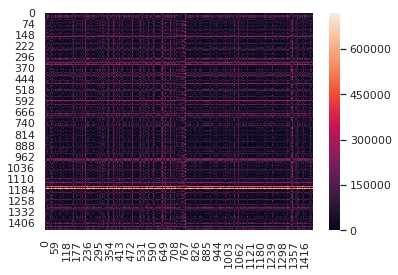

In [239]:
sns.heatmap(t)

This distance function has produced almost nice clustered neighbourhood values distribution on Scatter plot in below section. For record between 1110 to 1184, it has calculated strong values.

## Part 5 - Clustering

Distance Function clustering using features ['SalePrice', 'OverallQual', 'GrLivArea', 'YearBuilt', 'TotalBsmtSF']


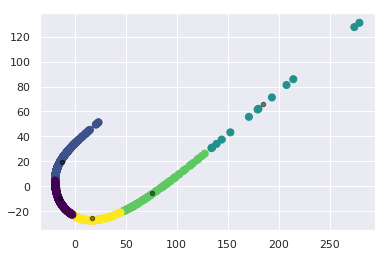

In [240]:
# TODO: code for clustering and visualization
from sklearn import cluster
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
t = StandardScaler().fit_transform(t)


pca = PCA(n_components=2)
principalComponents = pca.fit_transform(t)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

kmeans = cluster.KMeans(n_clusters=5,random_state=0).fit(principalDf)
y_kmeans = kmeans.predict(principalDf)

plt.scatter(principalDf['principal component 1'],principalDf['principal component 2'], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=20, alpha=0.5);

print('Distance Function clustering using features',imp_col)


Distance Function clustering using features vs Neighborhood


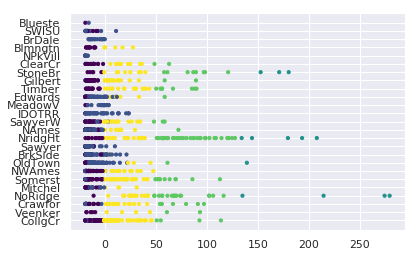

In [241]:
tneigh= np.array(train['Neighborhood'])
pca2 = PCA(n_components=1)
single = pca2.fit_transform(principalDf)
plt.scatter(single,tneigh, c=y_kmeans, s=10, cmap='viridis')
print('Distance Function clustering using features vs Neighborhood')



Cluster has nearly reflect neat neighborhood boundaries.We can observe the boundaries between two clusters almost clearly.

This Cluster has captured pairwise distance function values of records on the basis of features like 'SalePrice', 'OverallQual', 'GrLivArea', 'YearBuilt', 'TotalBsmtSF'.

## Part 6 - Linear Regression

In [0]:
import seaborn as sns; sns.set(color_codes=True)
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#ax = sns.regplot(x="total_bill", y="tip", data=tips)

Training Score: 0.6238544541779207


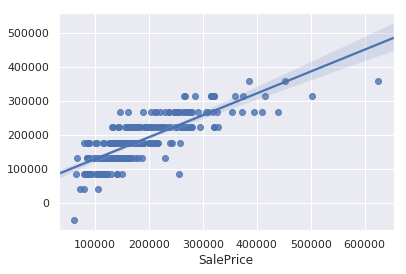

In [243]:
imp_col = ['OverallQual']
ltrain_X = train[imp_col]
ltrain_y = train.SalePrice

train_X,test_X, train_y,test_y=train_test_split(ltrain_X,ltrain_y,test_size=0.2,random_state=121)
LR = linear_model.LinearRegression().fit(train_X,train_y)
pred_y= LR.predict(test_X)
print('Training Score:',LR.score(train_X,train_y))
#print('Accuracy Score: ',accuracy_score(test_y,pred_y))
ax = sns.regplot(x=test_y, y=pred_y)

Training Score: 0.49653200164380495


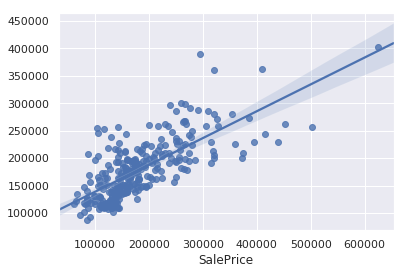

In [244]:
imp_col = ['GrLivArea']
ltrain_X = train[imp_col]
ltrain_y = train.SalePrice

train_X,test_X, train_y,test_y=train_test_split(ltrain_X,ltrain_y,test_size=0.2,random_state=121)
LR = linear_model.LinearRegression().fit(train_X,train_y)
pred_y= LR.predict(test_X)
print('Training Score:',LR.score(train_X,train_y))
#print('Accuracy Score: ',accuracy_score(test_y,pred_y))
ax = sns.regplot(x=test_y, y=pred_y)

Training Score: 0.3560715852007196


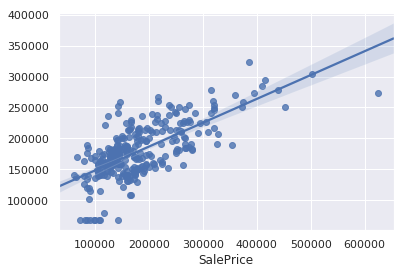

In [245]:
imp_col = ['TotalBsmtSF']
ltrain_X = train[imp_col]
ltrain_y = train.SalePrice

train_X,test_X, train_y,test_y=train_test_split(ltrain_X,ltrain_y,test_size=0.2,random_state=121)
LR = linear_model.LinearRegression().fit(train_X,train_y)
pred_y= LR.predict(test_X)
print('Training Score:',LR.score(train_X,train_y))
#print('Accuracy Score: ',accuracy_score(test_y,pred_y))
ax = sns.regplot(x=test_y, y=pred_y)

Training Score: 0.7085088903298699


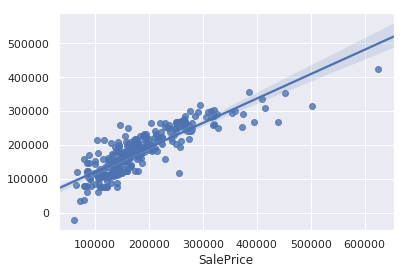

In [246]:
imp_col = ['OverallQual', 'GrLivArea']
ltrain_X = train[imp_col]
ltrain_y = train.SalePrice

train_X,test_X, train_y,test_y=train_test_split(ltrain_X,ltrain_y,test_size=0.2,random_state=121)
LR = linear_model.LinearRegression().fit(train_X,train_y)
pred_y= LR.predict(test_X)
print('Training Score:',LR.score(train_X,train_y))
#print('Accuracy Score: ',accuracy_score(test_y,pred_y))
ax = sns.regplot(x=test_y, y=pred_y)

Training Score: 0.7306604524579956


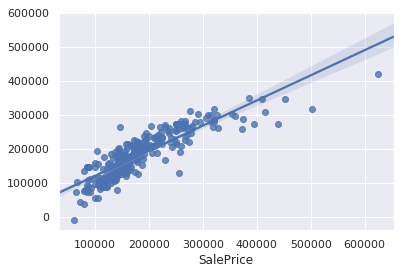

In [247]:

imp_col = ['OverallQual', 'GrLivArea','YearBuilt']
ltrain_X = train[imp_col]
ltrain_y = train.SalePrice

train_X,test_X, train_y,test_y=train_test_split(ltrain_X,ltrain_y,test_size=0.2,random_state=121)
LR = linear_model.LinearRegression().fit(train_X,train_y)
pred_y= LR.predict(test_X)
print('Training Score:',LR.score(train_X,train_y))
#print('Accuracy Score: ',accuracy_score(test_y,pred_y))
ax = sns.regplot(x=test_y, y=pred_y)

Training Score: 0.7468180984166838


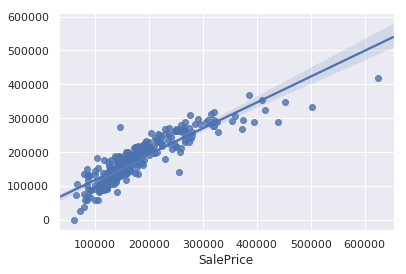

In [248]:
imp_col = ['OverallQual', 'GrLivArea','YearBuilt','TotalBsmtSF']#,'TotRmsAbvGrd','GarageCars']
ltrain_X = train[imp_col]
ltrain_y = train.SalePrice

train_X,test_X, train_y,test_y=train_test_split(ltrain_X,ltrain_y,test_size=0.2,random_state=121)
LR = linear_model.LinearRegression().fit(train_X,train_y)
pred_y= LR.predict(test_X)
print('Training Score:',LR.score(train_X,train_y))
#print('Accuracy Score: ',accuracy_score(test_y,pred_y))
ax = sns.regplot(x=test_y, y=pred_y)

Training Score: 0.7469150735086723


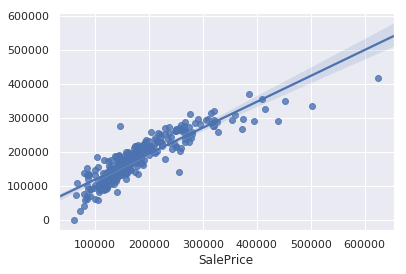

In [249]:
imp_col = ['OverallQual', 'GrLivArea','YearBuilt','TotalBsmtSF','TotRmsAbvGrd']
ltrain_X = train[imp_col]
ltrain_y = train.SalePrice

train_X,test_X, train_y,test_y=train_test_split(ltrain_X,ltrain_y,test_size=0.2,random_state=121)
LR = linear_model.LinearRegression().fit(train_X,train_y)
pred_y= LR.predict(test_X)
print('Training Score:',LR.score(train_X,train_y))
#print('Accuracy Score: ',accuracy_score(test_y,pred_y))
ax = sns.regplot(x=test_y, y=pred_y)

Training Score: 0.7571594557747291


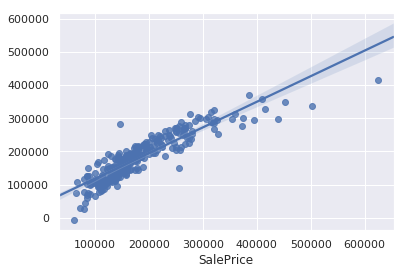

In [250]:
imp_col = ['OverallQual', 'GrLivArea','YearBuilt','TotalBsmtSF','TotRmsAbvGrd','GarageCars']
ltrain_X = train[imp_col]
ltrain_y = train.SalePrice

train_X,test_X, train_y,test_y=train_test_split(ltrain_X,ltrain_y,test_size=0.2,random_state=121)
LR = linear_model.LinearRegression().fit(train_X,train_y)
pred_y= LR.predict(test_X)
print('Training Score:',LR.score(train_X,train_y))
#print('Accuracy Score: ',accuracy_score(test_y,pred_y))
ax = sns.regplot(x=test_y, y=pred_y)

How well/badly does it work? Which are the most important variables?

Individually, the function best worked for OverallQual with Score = 0.6238544541779207. And badly worked TotalBsmtSF with Score = 0.3560715852007196.

And in combination of variables, it worked best for : -  'OverallQual','GrLivArea','YearBuilt','TotalBsmtSF','TotRmsAbvGrd','GarageCars'.
With the best Score = 0.7571594557747291.

The Most Important Variables are 'OverallQual','GrLivArea','YearBuilt','TotalBsmtSF'. As after adding 'TotRmsAbvGrd','GarageCars' the score values improved with very less margin.

## Part 7 - External Dataset

In [0]:
# TODO: code to import external dataset and test
Extra_train = pd.read_csv('brooklyn_sales_map.csv')


In [252]:
Extra_train.head()

,Unnamed: 0,borough,neighborhood,building_class_category,tax_class,block,lot,easement,building_class,address,apartment_number,zip_code,residential_units,commercial_units,total_units,land_sqft,gross_sqft,year_built,tax_class_at_sale,building_class_at_sale,sale_price,sale_date,year_of_sale,Borough,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,PolicePrct,HealthCent,HealthArea,SanitBoro,SanitDistr,SanitSub,Address,ZoneDist1,ZoneDist2,...,BldgFront,BldgDepth,Ext,ProxCode,IrrLotCode,LotType,BsmtCode,AssessLand,AssessTot,ExemptLand,ExemptTot,YearBuilt,YearAlter1,YearAlter2,HistDist,Landmark,BuiltFAR,ResidFAR,CommFAR,FacilFAR,BoroCode,BBL,CondoNo,Tract2010,XCoord,YCoord,ZoneMap,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLA,PFIRM15_FL,Version,MAPPLUTO_F,SHAPE_Leng,SHAPE_Area
0,1,3,DOWNTOWN-METROTECH,28 COMMERCIAL CONDOS,4,140,1001,NaN,R5,330 JAY STREET,COURT,11201,0,1,1,0.0,0.0,2002,4,R5,499401179.0,2008-04-23,2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,3,DOWNTOWN-FULTON FERRY,29 COMMERCIAL GARAGES,4,54,1,NaN,G7,85 JAY STREET,NaN,11201,0,0,0,134988.0,0.0,0,4,G7,345000000.0,2016-12-20,2016,BK,302.0,21.00,3017.0,13.0,33.0,11201.0,L118,84.0,36.0,1000.0,3.0,2.0,1B,87 JAY STREET,M1-2/R8,NaN,...,0.0,0.00,NaN,0.0,N,5.0,5.0,1571850.0,1571850.0,1571850.0,1571850.0,0.0,0.0,0.0,NaN,NaN,0.00,7.20,2.0,6.5,3.0,3.000540e+09,0.0,21.0,988208.0,195011.0,12d,NaN,302 016,30101.0,NaN,3.000540e+09,12/06/2002,1.0,NaN,NaN,17V1.1,0.0,1559.889144,140131.577176
2,3,3,BROOKLYN HEIGHTS,21 OFFICE BUILDINGS,4,204,1,NaN,O6,29 COLUMBIA HEIGHTS,NaN,11201,0,0,0,32000.0,304650.0,1924,4,O6,340000000.0,2016-08-03,2016,BK,302.0,1.00,1003.0,13.0,33.0,11201.0,E205,84.0,38.0,2300.0,3.0,2.0,1A,29 COLUMBIA HEIGHTS,M2-1,NaN,...,335.0,92.00,NaN,0.0,Y,3.0,5.0,1548000.0,25463250.0,0.0,0.0,1924.0,1980.0,0.0,NaN,NaN,9.52,0.00,2.0,0.0,3.0,3.002040e+09,0.0,1.0,985952.0,195007.0,12d,NaN,302 004,30106.0,NaN,0.000000e+00,NaN,1.0,NaN,NaN,17V1.1,0.0,890.718521,34656.447240
3,4,3,MILL BASIN,22 STORE BUILDINGS,4,8470,55,NaN,K6,5120 AVENUE U,NaN,11234,0,123,123,905000.0,2548000.0,1970,4,K6,276947000.0,2012-11-28,2012,BK,318.0,698.00,2005.0,22.0,46.0,11234.0,E323,63.0,35.0,8822.0,3.0,18.0,4E,5120 AVENUE U,M3-1,NaN,...,0.0,0.00,NaN,0.0,Y,3.0,5.0,36532350.0,149792400.0,0.0,0.0,1970.0,0.0,0.0,NaN,NaN,2.82,0.00,2.0,0.0,3.0,3.084700e+09,0.0,698.0,1006597.0,161424.0,23b,NaN,319 077,32502.0,NaN,0.000000e+00,NaN,1.0,1.0,1.0,17V1.1,0.0,3729.786857,797554.847834
4,5,3,BROOKLYN HEIGHTS,26 OTHER HOTELS,4,230,1,NaN,H8,21 CLARK STREET,NaN,11201,0,1,1,20267.0,356000.0,1927,4,H8,202500000.0,2017-10-31,2017,BK,302.0,3.01,2000.0,13.0,33.0,11201.0,E205,84.0,38.0,2300.0,3.0,2.0,1A,79 WILLOW STREET,R6,NaN,...,202.0,100.33,NaN,0.0,N,3.0,2.0,2250000.0,27166050.0,2250000.0,27166050.0,1927.0,1998.0,2000.0,Brooklyn Heights Historic District,NaN,17.57,2.43,0.0,4.8,3.0,3.002300e+09,0.0,301.0,985622.0,193713.0,12d,NaN,302 014,30106.0,NaN,0.000000e+00,NaN,1.0,NaN,NaN,17V1.1,0.0,620.761169,21360.147631


In [253]:
Extra = Extra_train.loc[0:1459,['HealthArea','PolicePrct']]
Extra.shape


(1460, 2)

In [254]:
#Extra_total_null = Extra['tax_class'].isnull().sum().sort_values(ascending=False)
#Extra_total_null.head(40)
Extra = pd.DataFrame(Extra, columns = ['HealthArea','PolicePrct'])

Extra.describe()


,HealthArea,PolicePrct
count,1292.000000,1292.000000
mean,4012.614551,77.430341
std,2826.532614,10.282106
min,100.000000,60.000000
25%,1410.000000,70.000000
50%,3600.000000,77.000000
75%,6420.000000,84.000000
max,9300.000000,94.000000


In [0]:
Extra['HealthArea'].fillna(Extra['HealthArea'].value_counts().index[0],inplace=True) #Removing NaN value
#test_nf[i].fillna(test_nf[i].value_counts().index[0],inplace=True)
Extra['PolicePrct'].fillna(Extra['PolicePrct'].value_counts().index[0],inplace=True) #Removing NaN value



In [256]:
Extra.describe()

,HealthArea,PolicePrct
count,1460.000000,1460.000000
mean,3815.546575,78.186301
std,2714.445016,9.896771
min,100.000000,60.000000
25%,1710.000000,70.000000
50%,2710.000000,78.000000
75%,5810.000000,84.000000
max,9300.000000,94.000000


In [0]:
new_train = train.copy()
new_train['HealthArea'] = Extra['HealthArea']
new_train['PolicePrct'] = Extra['PolicePrct']

In [258]:
new_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HealthArea,PolicePrct
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,2300.0,84.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,1000.0,84.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,2300.0,84.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,8822.0,63.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,2300.0,84.0


In [259]:
new_train['PolicePrct'].unique()

array([84., 63., 90., 94., 88., 69., 73., 60., 72., 78., 76., 83., 79.,
       61., 67., 70., 77., 68., 75., 71., 66., 62., 81.])

In [260]:
new_train['HealthArea'].unique()

array([2300., 1000., 8822.,  400.,  700.,  500., 9300., 1200., 7510.,
        100., 5900., 9020., 4400., 3100., 4500.,  600., 2400., 5310.,
       2500., 1710., 1720., 9010., 7320., 4000., 1410., 2710., 5810.,
       5320., 3200., 5600., 7520., 2600., 2900., 6700., 7210., 2720.,
       8721., 2200., 6500., 5400., 7820.,  900., 9120., 4100., 6420.,
       1100., 4300., 6600., 3900., 1500., 3700., 7420., 8810., 8722.,
        300., 8620., 8110., 9110., 4600., 6000., 3600., 7120., 6800.,
       4800.,  800., 7000., 1800., 7810., 2100., 7220., 1300., 5020.,
       4700., 8400., 7310., 8900., 1900., 7410., 2800., 6410., 6300.,
       6900., 8710., 8821., 8510., 5510., 5700.,  200., 6200., 7910.,
       8610., 5010., 8522., 4200., 5520., 4900., 8300., 3300., 6100.,
       2000., 3820., 7110., 7600., 8120., 7700., 8200., 3400., 3500.,
       3000., 8521.])

Training Score: 0.0012986044698914956


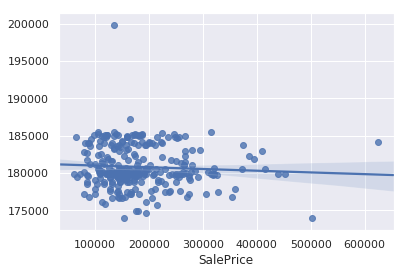

In [261]:
imp_col = ['HealthArea','PolicePrct']
ltrain_X = new_train[imp_col]
ltrain_y = new_train.SalePrice

train_X,test_X, train_y,test_y=train_test_split(ltrain_X,ltrain_y,test_size=0.2,random_state=121)
LR = linear_model.LinearRegression().fit(train_X,train_y)
pred_y= LR.predict(test_X)
print('Training Score:',LR.score(train_X,train_y))
#print('Accuracy Score: ',accuracy_score(test_y,pred_y))
ax = sns.regplot(x=test_y, y=pred_y)

Training Score: 0.7577172662084726


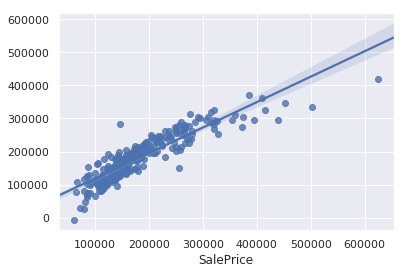

In [262]:
imp_col = ['OverallQual', 'GrLivArea','YearBuilt','TotalBsmtSF','TotRmsAbvGrd','GarageCars','HealthArea','PolicePrct']
ltrain_X = new_train[imp_col]
ltrain_y = new_train.SalePrice

train_X,test_X, train_y,test_y=train_test_split(ltrain_X,ltrain_y,test_size=0.2,random_state=121)
LR = linear_model.LinearRegression().fit(train_X,train_y)
pred_y= LR.predict(test_X)
print('Training Score:',LR.score(train_X,train_y))
#print('Accuracy Score: ',accuracy_score(test_y,pred_y))
ax = sns.regplot(x=test_y, y=pred_y)

We got training Score: 0.7571594557747291 without External Dataset.


> Improved Score is: 0.7577172662084726 with External Dataset, which is improved by 0.0005578104337435‬ value.

We have added two features from exteranl dataset. i.e. 'HealthArea','PolicePrct'. They are the nearest Health Area and Police station value.

So, this dataset has not improved the performance of the model significantly.


## Part 8 - Permutation Test

In [0]:
from sklearn import model_selection
import warnings
warnings.filterwarnings("ignore")

#ax = sns.regplot(x=test_y, y=pred_y)

In [264]:
# TODO: code for all permutation tests
imp_col = [ 'MSSubClass','LotArea','OverallQual', 'GrLivArea','YearBuilt','BsmtUnfSF','TotalBsmtSF','OverallCond','TotRmsAbvGrd','GarageCars']

for col in imp_col:
  print('For Single Value Linear Regression Model for feature: - ',col,'\n')
  ltrain_X = train[[col]]
  ltrain_y = train.SalePrice

  train_X,test_X, train_y,test_y=train_test_split(ltrain_X,ltrain_y,test_size=0.2,random_state=121)
  LR = linear_model.LinearRegression().fit(train_X, train_y)
  pred_y= LR.predict(test_X)

  score,permu_score,p_value = model_selection.permutation_test_score(LR, train_X, train_y)
  #print('score = ',score,'\nPermutation Scores for 100 permutations =\n ',permu_score,'\np-value = ',p_value)
  print('\np-value = ',p_value)

  #Taking Log(Price) and calculating RMSE score
  pred_y = np.log(pred_y)
  test_y = np.log(test_y)

  mse = np.sum((pred_y - test_y)**2)
  rmse = np.sqrt(mse/len(test_y))
  print('RMSE Score:-', rmse, '\n')

For Single Value Linear Regression Model for feature: -  MSSubClass 


p-value =  0.009900990099009901
RMSE Score:- 0.3969620757983285 

For Single Value Linear Regression Model for feature: -  LotArea 


p-value =  0.009900990099009901
RMSE Score:- 0.38048865373602975 

For Single Value Linear Regression Model for feature: -  OverallQual 


p-value =  0.009900990099009901
RMSE Score:- 0.25555425781965596 

For Single Value Linear Regression Model for feature: -  GrLivArea 


p-value =  0.009900990099009901
RMSE Score:- 0.2669930628927558 

For Single Value Linear Regression Model for feature: -  YearBuilt 


p-value =  0.009900990099009901
RMSE Score:- 0.3487622166057057 

For Single Value Linear Regression Model for feature: -  BsmtUnfSF 


p-value =  0.009900990099009901
RMSE Score:- 0.38286152377984267 

For Single Value Linear Regression Model for feature: -  TotalBsmtSF 


p-value =  0.009900990099009901
RMSE Score:- 0.30079920858409465 

For Single Value Linear Regression Model 

p-value for 9 features i.e. 'MSSubClass','LotArea','OverallQual', 'GrLivArea','YearBuilt','BsmtUnfSF','TotalBsmtSF','TotRmsAbvGrd','GarageCars' is less than 0.05.

> p-value =  0.009900990099009901 < 0.05

Thus, these features can be used in our model. It means the Prediction feature(SalePrice) efficiency will increase with these models.

On the other hand, p-value for 'OverallCond', is greater than 0.05. Thus, this feature is not good for our model.


> p-value =  0.25742574257425743 < 0.05









## Part 9 - Final Result

Removing NaN

In [265]:
train_total_null = train.isnull().sum().sort_values(ascending=False)
train_total_null.head(20)


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

In [266]:
test_total_null = test.isnull().sum().sort_values(ascending=False)
test_total_null.head(40)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageQual        78
GarageYrBlt       78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
BsmtUnfSF          1
TotalBsmtSF        1
SaleType           1
Exterior1st        1
KitchenQual        1
GarageArea         1
GarageCars         1
HouseStyle         0
LandSlope          0
MSSubClass         0
LotArea            0
Street             0
LotShape           0
LandContour        0
dtype: int64

In [267]:
#we need to remove the columns with null values.
train_nf = train.drop((train_total_null[train_total_null > 1]).index,1) #Removing all the columns with null values
train_nf = train_nf.drop(train_nf.loc[train_nf['Electrical'].isnull()].index) # Removing one record with NaN value
train_nf.shape

(1459, 63)

In [268]:
test_nf = test.drop((test_total_null[test_total_null > 4]).index,1) #Removing all the columns with null values
Nan_columns = test_total_null[test_total_null <5].index

for  i in Nan_columns:
    test_nf[i].fillna(test_nf[i].value_counts().index[0],inplace=True)
test_nf.shape

(1459, 62)

Label Encoding and Custom Mapping and Removing Outliers.

In [269]:
#labels_cols = ['ExterQual', 'ExterCond','HeatingQC', 'KitchenQual','Functional','LandSlope','LotShape', 'PavedDrive', 'Street','CentralAir', 'MSSubClass', 'OverallCond','YrSold', 'MoSold']
train_lbe=train_nf.copy()
Dict_Qual_LotS = {'Ex': 5, 'Gd': 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, 'Reg': 4,'IR1':3 ,'IR2':2, 'IR3':1 }
Dict_Functional = {'Functional' : { 'Typ': 8, 'Min1' : 7,'Min2' : 6, 'Mod' :5,'Maj1': 4, 'Maj2': 3, 'Sev': 2, 'Sal': 1}}
Dict_PavedDrive = {'PavedDrive' : {'Y': 3, 'P': 2, 'N': 1}}
Dict_Utilities = {'Utilities' : {'AllPub' : 4, 'NoSewr' : 3, 'NoSewa' : 2, 'ELO' : 1}}
train_lbe = train_lbe.replace(Dict_Qual_LotS)
train_lbe = train_lbe.replace(Dict_Functional)
train_lbe = train_lbe.replace(Dict_PavedDrive)
train_lbe = train_lbe.replace(Dict_Utilities)

train_lbe.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,4,Lvl,4,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,4,3,PConc,706,0,150,856,GasA,5,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,4,8,8,0,2,548,3,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,4,Lvl,4,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,3,3,CBlock,978,0,284,1262,GasA,5,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,3,6,8,1,2,460,3,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,3,Lvl,4,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,4,3,PConc,486,0,434,920,GasA,5,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,4,6,8,1,2,608,3,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,3,Lvl,4,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,3,3,BrkTil,216,0,540,756,GasA,4,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,4,7,8,1,3,642,3,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,3,Lvl,4,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,4,3,PConc,655,0,490,1145,GasA,5,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,4,9,8,1,3,836,3,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [0]:
test_lbe = test_nf.copy()
test_lbe = test_lbe.replace(Dict_Qual_LotS)
test_lbe = test_lbe.replace(Dict_Functional)
test_lbe = test_lbe.replace(Dict_PavedDrive)
test_lbe = test_lbe.replace(Dict_Utilities)


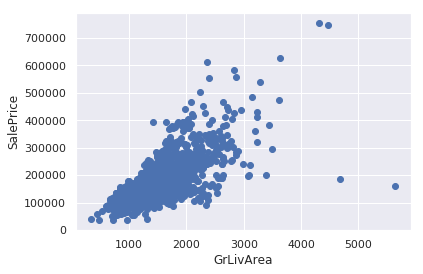

In [271]:
fig, ax = plt.subplots()
ax.scatter(x = train_lbe['GrLivArea'], y = train_lbe['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GrLivArea')
plt.show()

We can see two outliers with GrLivArea value more than 4000. These are bad for our model. So, we will remove them.

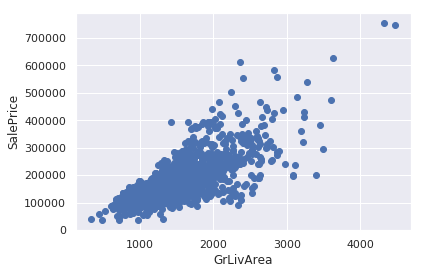

In [272]:
train_lbe = train_lbe.drop(train_lbe[(train_lbe['GrLivArea']>4000) & (train_lbe['SalePrice']<300000)].index) #Removing Outliers

fig, ax = plt.subplots()
ax.scatter(x = train_lbe['GrLivArea'], y = train_lbe['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GrLivArea')
plt.show()

In [273]:
total_lbe = pd.concat((train_lbe.loc[:,'MSSubClass':'SaleCondition'],
                      test_lbe.loc[:,'MSSubClass':'SaleCondition']))

labels_cols = ['Street','LandContour','LandSlope','CentralAir', 'MSSubClass', 'OverallCond','YrSold', 'MoSold']

for i in labels_cols:
    lbl = LabelEncoder() 
    lbl.fit(list(total_lbe[i].values)) 
    #print(lbl.classes_)
    total_lbe[i] = lbl.transform(list(total_lbe[i].values))
    
total_lbe = pd.get_dummies(total_lbe) #Converting rest of the Categorical columns into dummy/indicator variables
total_lbe.shape   

(2916, 193)

In [274]:
#final_train = train_lbe.copy()
train_x = total_lbe[:train_lbe.shape[0]]
test_x = total_lbe[train_lbe.shape[0]:]
y = train_lbe.SalePrice


from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score

#Using LASSO Regression with Cross Validation
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005],cv = 5,max_iter=100000).fit(train_x, y) 
model_lasso.score(train_x,y)

0.9171304413033301

We have used LASSO Regression with Cross Validation to predict the value of test data set. alphas are the regularization coefficient which we choose with 5- fold Cross validation whichever is best for our model.

In [0]:
#test_x.head()
pred = model_lasso.predict(test_x)
sub_pred=pd.DataFrame([test['Id']]).T
sub_pred['SalePrice']=pred
sub_pred.to_csv('submission.csv',index = False)

Report the rank, score, number of entries, for your highest rank. Include a snapshot of your best score on the leaderboard as confirmation. Be sure to provide a link to your Kaggle profile. Make sure to include a screenshot of your ranking. Make sure your profile includes your face and affiliation with SBU.

Kaggle Link: https://www.kaggle.com/rorawat

Highest Rank: 3842


Score: 0.17902

Number of entries: 2

![alt text](https://drive.google.com/open?id=1CG0CcIs5gUuufL0VnnetxGU-Lj0dM2nn)